## r(data,data)

In [52]:
host = 'SYNPAI' #'Mac' #'habanero'
if host == 'habanero':
    resultdir = '/rigel/issa/users/Tahereh/Results/'
    
elif host == 'Mac':
    resultdir ='/Users/tahereh/Documents/Results/'
    
elif host == 'SYNPAI':
    resultdir = '/home/tahereh/Documents/Research/Results/Mapping_unit_test/'

In [53]:
import pickle
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as ss


In [98]:
ni, nf, nt = 1000, 168, 50
reg_methods = ['OMP', 'PLS', 'ridge']
noise_dist, Collinearity, various_unit_stds, spearman_brown, noisy_map  = 'normal', True, True, False, False

file = open(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s.pickle' % (
    reg_methods, ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map), 'rb')

data_list = pickle.load(file)
file.close()
r12,r11,r22,r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list

_

Text(0.25,1.2,'#images = 1000, #features = 168, #trials = 50, Collinearity = False, normal noise')

/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in sqrt


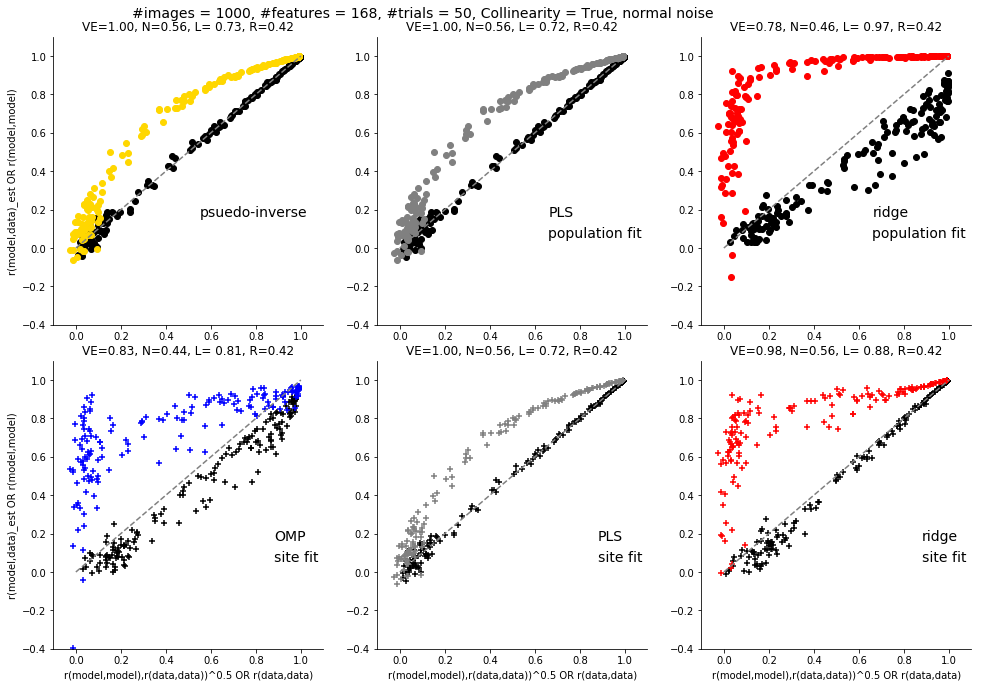

In [99]:
fig = plt.figure(figsize=[15, 10])
ax0 = fig.add_axes([0.1, 0.05, 0.25, 0.40])
ax1 = fig.add_axes([0.4, 0.05, 0.25, 0.40])
ax2 = fig.add_axes([0.7, 0.05, 0.25, 0.40])
ax3 = fig.add_axes([0.1, 0.5, 0.25, 0.40])
ax4 = fig.add_axes([0.4, 0.5, 0.25, 0.40])
ax5 = fig.add_axes([0.7, 0.5, 0.25, 0.40])

for iax, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.4, 1.1])
    
ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax3.set_ylabel('r(model,data)_est OR r(model,model)')

for iax, ax in enumerate([ax0, ax1, ax2]):
    ax.scatter(np.sqrt(r11_reg_sitfit[:,iax]*r22_reg_sitfit[:,iax]), r12_reg_sitfit[:,iax], color='k',
                    label='Nom. vs. Denom.', marker='+')
    ax.scatter(r22_reg_sitfit[:,iax], r11_reg_sitfit[:,iax], color=colors[iax], label='LHS vs. RHS', marker='+')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    
    VE = np.nanmedian(r12_reg_sitfit[:,iax]/np.sqrt(r11_reg_sitfit[:, iax]*r22_reg_sitfit[:, iax]))
    N = np.median(r12_reg_sitfit[:, iax])
    L = np.median(r11_reg_sitfit[:, iax])
    R = np.median(r22_reg_sitfit[:, iax])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.8*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'%s'%reg_methods[iax], fontsize=14)
    ax.text(0.8*ax.get_xlim()[1],0.05*ax.get_ylim()[1],'site fit', fontsize=14)
    ax.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

    
    

#ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=16)

#------------------------------
ax3.scatter(np.sqrt(r11.mean(1)*r22.mean(1)), r12.mean(1), color='k', label='Nom. vs. Denom.')
ax3.scatter(r22.mean(1), r11.mean(1), color='gold', label='LHS vs. RHS')
ax3.plot([0, 1], [0, 1], ls='--', color='gray')
ax3.text(0.5*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'psuedo-inverse', fontsize=14)

VE = np.nanmedian(r12/np.sqrt(r11*r22))
N = np.median(r12)
L = np.median(r11)
R = np.median(r22)
ax3.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))

for iax, ax in enumerate([ax4, ax5]):
    ax.scatter(np.sqrt(r11_reg[:,iax+1]*r22_reg[:,iax+1]), r12_reg[:,iax+1], color='k',
                    label='Nom. vs. Denom.')
    ax.scatter(r22_reg[:,iax+1], r11_reg[:,iax+1], color=colors[iax+1], label='LHS vs. RHS')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    
    
    VE = np.nanmedian(r12_reg[:,iax+1]/np.sqrt(r11_reg[:, iax+1]*r22_reg[:, iax+1]))
    N = np.median(r12_reg[:, iax+1])
    L = np.median(r11_reg[:, iax+1])
    R = np.median(r22_reg[:, iax+1])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.6*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'%s'%reg_methods[iax+1], fontsize=14)
    ax.text(0.6*ax.get_xlim()[1],0.05*ax.get_ylim()[1],'population fit', fontsize=14)

    
#print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
#print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax3.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)



fig.savefig(resultdir+'unit_test_6panels_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)
fig.savefig(resultdir+'unit_test_6panels_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)

/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


Text(0.25,1.2,'#images = 1000, #features = 168, #trials = 50, Collinearity = False, normal noise')

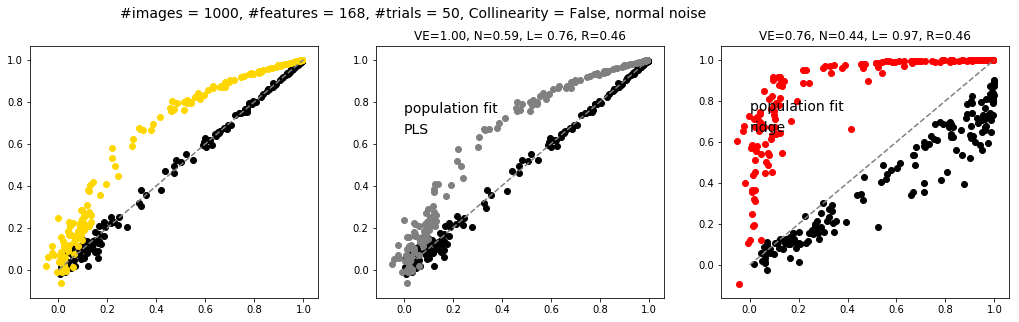

In [57]:

# ----------------------------------------------------------

# if reg_method == 'ridge':
#     color = 'r'
# elif reg_method == 'PLS':
#     color = 'gray'
# elif reg_method == 'OMP':
#     color = 'blue'

colors = ['blue', 'gray', 'red']
reg_methods

color = 'r'
fig = plt.figure(figsize=[16, 5])
ax0 = fig.add_axes([0.1,0.11,0.25,0.70])
ax1 = fig.add_axes([0.4,0.11,0.25,0.70])
ax2 = fig.add_axes([0.7,0.11,0.25,0.70])

ax0.scatter(np.sqrt(r11.mean(1)*r22.mean(1)), r12.mean(1), color='k', label='Nom. vs. Denom.')
ax0.scatter(r22.mean(1), r11.mean(1), color='gold', label='LHS vs. RHS')
ax0.plot([0, 1], [0, 1], ls='--', color='gray')

for iax, ax in enumerate([ax1, ax2]):
    ax.scatter(np.sqrt(r11_reg[:,iax+1]*r22_reg[:,iax+1]), r12_reg[:,iax+1], color='k',
                    label='Nom. vs. Denom.')
    ax.scatter(r22_reg[:,iax+1], r11_reg[:,iax+1], color=colors[iax+1], label='LHS vs. RHS')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    VE = np.nanmedian(r12_reg[:,iax+1]/np.sqrt(r11_reg[:, iax+1]*r22_reg[:, iax+1]))
    N = np.median(r12_reg[:, iax+1])
    L = np.median(r11_reg[:, iax+1])
    R = np.median(r22_reg[:, iax+1])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.0,0.65,'%s'%reg_methods[iax+1], fontsize=14)
    ax.text(0.0,0.75,'population fit', fontsize=14)

    
#print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
#print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)






/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


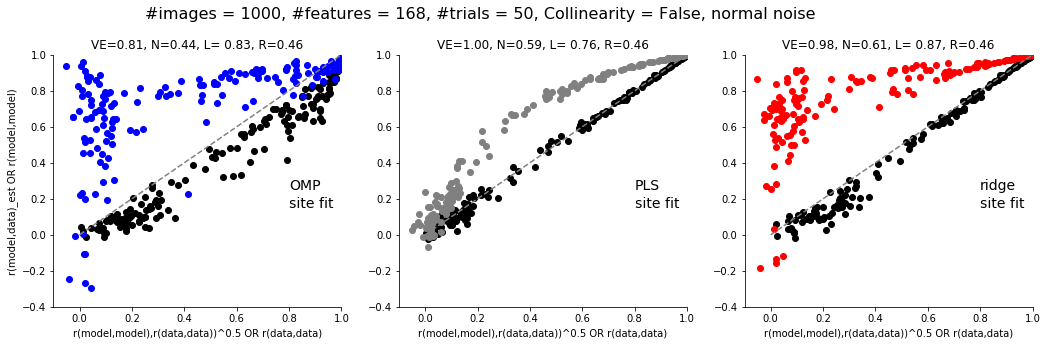

In [65]:
fig = plt.figure(figsize=[16, 5])
ax0 = fig.add_axes([0.1,0.11,0.25,0.70])
ax1 = fig.add_axes([0.4,0.11,0.25,0.70])
ax2 = fig.add_axes([0.7,0.11,0.25,0.70])



for iax, ax in enumerate([ax0, ax1, ax2]):
    ax.scatter(np.sqrt(r11_reg_sitfit[:,iax]*r22_reg_sitfit[:,iax]), r12_reg_sitfit[:,iax], color='k',
                    label='Nom. vs. Denom.')
    ax.scatter(r22_reg_sitfit[:,iax], r11_reg_sitfit[:,iax], color=colors[iax], label='LHS vs. RHS')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([-0.4, 1])
    
    VE = np.nanmedian(r12_reg_sitfit[:,iax]/np.sqrt(r11_reg_sitfit[:, iax]*r22_reg_sitfit[:, iax]))
    N = np.median(r12_reg_sitfit[:, iax])
    L = np.median(r11_reg_sitfit[:, iax])
    R = np.median(r22_reg_sitfit[:, iax])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.8*ax.get_xlim()[1],0.25*ax.get_ylim()[1],'%s'%reg_methods[iax], fontsize=14)
    ax.text(0.8*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'site fit', fontsize=14)
    ax.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    
ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=16)


fig.savefig(resultdir+'unit_test_sitfit_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)
fig.savefig(resultdir+'unit_test_sitfit_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)


/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in sqrt


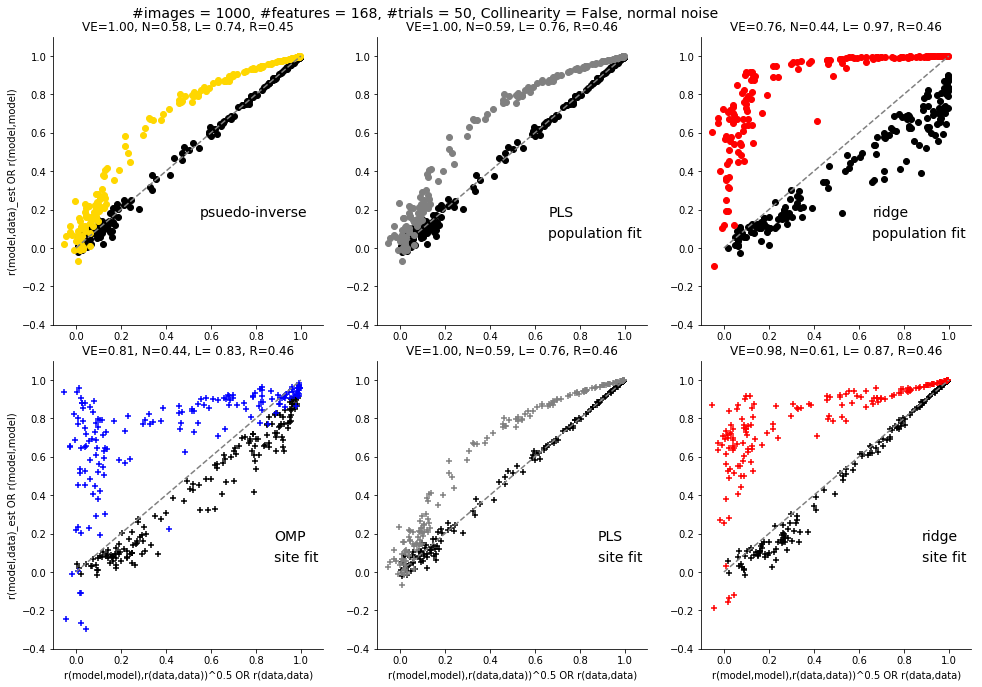

/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


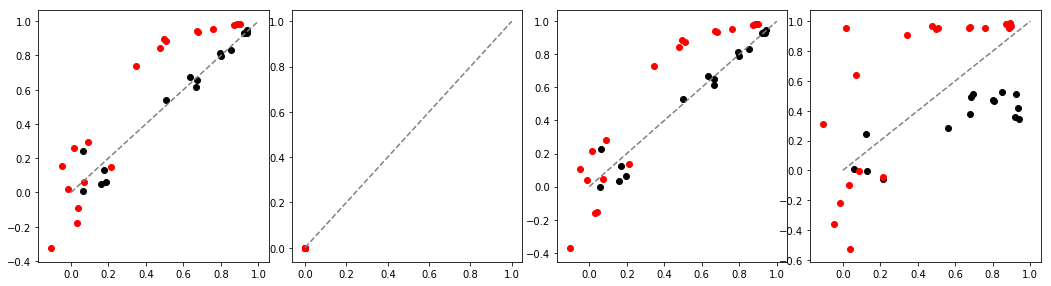

In [ ]:

if reg_method != 'OMP':
    ax1.scatter(np.sqrt(r11_reg.mean(1)*r22_reg.mean(1)), r12_reg.mean(1), color='k',
                label='Nom. vs. Denom.')
    ax1.scatter(r22_reg.mean(1), r11_reg.mean(1), color=color, label='LHS vs. RHS')
    ax1.plot([0, 1], [0, 1], ls='--', color='gray')

ax2.scatter(np.sqrt(r11_reg_sitfit.mean(1)*r22_reg_sitfit.mean(1)), r12_reg_sitfit.mean(1),
            color='k', marker='x', label='Nom. vs. Denom.')
ax2.scatter(r22_reg_sitfit.mean(1), r11_reg_sitfit.mean(1), color=color, marker='x',
            label='LHS vs. RHS')
ax2.plot([0, 1], [0, 1], ls='--', color='gray')

for ax in [ax0, ax2]:

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], loc='upper left')

ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax1.set_yticks([])
ax0.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12/np.sqrt(r11*r22)), np.median(r12),
                                                   np.median(r11), np.median(r22)))
ax0.text(0.0, 0.75, 'inversion', fontsize=14)
ax0.text(0.0, 0.71, corr_method_for_inv+'corr', fontsize=14)

if reg_method != 'OMP':
    ax1.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], labels[:2], loc='upper left')
    ax1.text(0.0, 0.75, 'regression:%s'%reg_method, fontsize=14)
    ax1.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg),                                                   np.median(r11_reg),np.median(r22_reg)))
else:
    ax1.set_xticks([])
    ax1.axis('off')

    ax0.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax2.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)

ax2.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit),np.median(r22_reg_sitfit)))
ax2.text(0.0,0.75,'regression-sitefit', fontsize=14)
ax2.text(0.0,0.65,'%s'%reg_method, fontsize=14)

print('Reg-sitefit: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit), np.median(r22_reg_sitfit)))

# fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)
# fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)


Pinv: VarExp=1.000, Num =0.887, LHS= 0.972, RHS=0.815
Reg: VarExp=1.057, Num =1.000, LHS= 0.997, RHS=0.898
Reg-sitefit: VarExp=nan, Num =0.000, LHS= 0.000, RHS=0.000


/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide


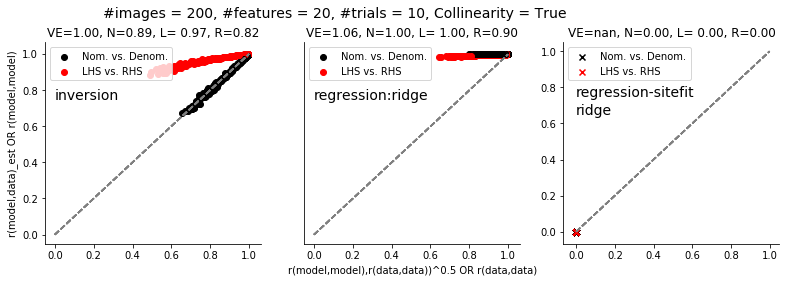

In [8]:
# ----------------
# Read data
# ----------------
# ni,nf,nt = 20,20,10
# reg_method,reg_params,Collinearity = 'ridge','[]',True

# ni,nf,nt = 20,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True


# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'ridge','[]',True

# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True
# 
# 
# 
# file = open(resultdir+'unit_test_%s_%s_ni%d_nf%d_nt%d_collinearity%s.pickle'%\
#                             (reg_method,reg_params,ni,nf,nt,Collinearity),'rb')
# data_list = pickle.load(file)
# file.close()
# r12,r11,r22,r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list
# ----------------------------------------------------------

if reg_method == 'ridge':
    color = 'r'
elif reg_method == 'PLS':
    color = 'gray'
elif reg_method == 'OMP':
    color = 'blue'
    
    
fig = plt.figure(figsize=[12,4])
ax0 = fig.add_axes([0.1,0.11,0.25,0.70])
ax1 = fig.add_axes([0.4,0.11,0.25,0.70])
ax2 = fig.add_axes([0.7,0.11,0.25,0.70])

# ax0 = fig.add_axes([0.1, 0.11, 0.2, 0.70])
# ax1 = fig.add_axes([0.32, 0.11, 0.2, 0.70])
# ax2 = fig.add_axes([0.55, 0.11, 0.2, 0.70])
# ax3 = fig.add_axes([0.77, 0.11, 0.2, 0.70])

for s in range(sd.shape[0]):
    
    ax0.scatter(np.sqrt(r11[s].mean(1)*r22[s].mean(1)), r12[s].mean(1), color = 'k', label ='Nom. vs. Denom.')
    ax0.scatter(r22[s].mean(1), r11[s].mean(1), color=color, label = 'LHS vs. RHS')
    ax0.plot([0, 1], [0, 1], ls='--', color='gray')
    
    if reg_method != 'OMP':
        ax1.scatter(np.sqrt(r11_reg[s].mean(1)*r22_reg[s].mean(1)), r12_reg[s].mean(1), color='k',
                    label='Nom. vs. Denom.')
        ax1.scatter(r22_reg[s].mean(1), r11_reg[s].mean(1), color=color, label='LHS vs. RHS')
        ax1.plot([0, 1], [0, 1], ls='--', color='gray')
    
    ax2.scatter(np.sqrt(r11_reg_sitfit[s].mean(1)*r22_reg_sitfit[s].mean(1)), r12_reg_sitfit[s].mean(1), 
                color='k', marker='x', label='Nom. vs. Denom.')
    ax2.scatter(r22_reg_sitfit[s].mean(1), r11_reg_sitfit[s].mean(1), color=color, marker='x',
                label='LHS vs. RHS')
    ax2.plot([0, 1], [0, 1], ls='--', color='gray')
       
    
for ax in [ax0, ax2]:    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], loc='upper left')


ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax1.set_yticks([])
ax0.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12/np.sqrt(r11*r22)), np.median(r12),
                                                   np.median(r11), np.median(r22))) 
ax0.text(0.0, 0.75, 'inversion', fontsize=14)

if reg_method != 'OMP':
    ax1.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], labels[:2], loc='upper left')
    ax1.text(0.0, 0.75, 'regression:%s'%reg_method, fontsize=14)
    ax1.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)),np.median(r12_reg),\
                                                   np.median(r11_reg),np.median(r22_reg)))
else:
    ax1.set_xticks([])
    ax1.axis('off')
   
    ax0.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax2.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22))\
            ,np.median(r12), np.median(r11), np.median(r22))) 
print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg))) 
ax0.text(0.25,1.2,'#images = %d, #features = %d, #trials = %d, Collinearity = %s'%(ni, nf, nt, Collinearity), fontsize=14)

ax2.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit))\
                ,np.median(r12_reg_sitfit), np.median(r11_reg_sitfit),np.median(r22_reg_sitfit))) 
ax2.text(0.0,0.75,'regression-sitefit', fontsize=14)
ax2.text(0.0,0.65,'%s'%reg_method, fontsize = 14)

print('Reg-sitefit: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%\
              (np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit))\
            ,np.median(r12_reg_sitfit), np.median(r11_reg_sitfit), np.median(r22_reg_sitfit))) 

fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_SB%s.png'%(reg_method, ni, nf, nt, Collinearity, spearman_brown), dpi=300)
fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_SB%s.pdf'%(reg_method, ni, nf, nt, Collinearity, spearman_brown), dpi=300)


In [18]:
# ----------------
# Read data
# ----------------
# ni,nf,nt = 20, 20, 10
# reg_method,reg_params,Collinearity = 'ridge','[]',True

# ni,nf,nt = 20,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True
# 
# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'ridge','[]',True
# 
# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True

#
#
# file = open(resultdir+'unit_test_%s_%s_ni%d_nf%d_nt%d_collinearity%s.pickle'%\
#                             (reg_method,reg_params,ni,nf,nt,Collinearity),'rb')
# 
# data_list = pickle.load(file)
# file.close()
# r12, r11, r22, r12_reg, r11_reg, r22_reg, r12_reg_sitfit, r11_reg_sitfit, r22_reg_sitfit = data_list

# ----------------------------------------------------------

if reg_method == 'ridge':
    color = 'r'
elif reg_method == 'PLS':
    color = 'gray'
elif reg_method == 'OMP':
    color = 'blue'

fig = plt.figure(figsize=[12, 5])
ax0 = fig.add_axes([0.1, 0.11, 0.25, 0.70])
ax1 = fig.add_axes([0.4, 0.11, 0.25, 0.70])
ax2 = fig.add_axes([0.7, 0.11, 0.25, 0.70])

ax0.scatter(np.sqrt(r11.mean(1)*r22.mean(1)), r12.mean(1), color = 'k', label ='Nom. vs. Denom.')
ax0.scatter(r22.mean(1), r11.mean(1), color=color, label='LHS vs. RHS')
ax0.plot([0, 1], [0, 1], ls='--', color='gray')

if reg_method != 'OMP':
    ax1.scatter(np.sqrt(r11_reg.mean(1)*r22_reg.mean(1)), r12_reg.mean(1), color='k',
                label='Nom. vs. Denom.')
    ax1.scatter(r22_reg.mean(1), r11_reg.mean(1), color=color, label='LHS vs. RHS')
    ax1.plot([0, 1], [0, 1], ls='--', color='gray')

ax2.scatter(np.sqrt(r11_reg_sitfit.mean(1)*r22_reg_sitfit.mean(1)), r12_reg_sitfit.mean(1),
            color='k', marker='x', label='Nom. vs. Denom.')
ax2.scatter(r22_reg_sitfit.mean(1), r11_reg_sitfit.mean(1), color=color, marker='x',
            label='LHS vs. RHS')
ax2.plot([0, 1], [0, 1], ls='--', color='gray')

for ax in [ax0, ax2]:

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], loc='upper left')

ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax1.set_yticks([])
ax0.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12/np.sqrt(r11*r22)), np.median(r12),
                                                   np.median(r11), np.median(r22)))
ax0.text(0.0, 0.75, 'inversion', fontsize=14)
ax0.text(0.0, 0.71, corr_method_for_inv+'corr', fontsize=14)

if reg_method != 'OMP':
    ax1.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], labels[:2], loc='upper left')
    ax1.text(0.0, 0.75, 'regression:%s'%reg_method, fontsize=14)
    ax1.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg),                                                   np.median(r11_reg),np.median(r22_reg)))
else:
    ax1.set_xticks([])
    ax1.axis('off')

    ax0.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax2.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)

ax2.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit),np.median(r22_reg_sitfit)))
ax2.text(0.0,0.75,'regression-sitefit', fontsize=14)
ax2.text(0.0,0.65,'%s'%reg_method, fontsize=14)

print('Reg-sitefit: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit), np.median(r22_reg_sitfit)))

# fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)
# fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)



array([0.3351818 , 0.31109495, 0.13738049, 0.18983743, 0.10974442,
       0.17549136, 0.30023373, 0.16801353, 0.19207669, 0.26362999,
       0.15808035, 0.28946347, 0.36123974, 0.29057761, 0.30399473,
       0.22368785, 0.22406926, 0.27056464, 0.24003494, 0.1534856 ])